In [ ]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import StandardScaler

# task a CNN

In [ ]:
column_names = ["acousticness",	"liveness",	"speechiness",	"valence",	"music_genre"]
df = pd.read_csv("/content/music_genre.csv", names = column_names)
df.head(2)

,acousticness,liveness,speechiness,valence,music_genre
0,0.00468,0.115,0.0748,0.759,0
1,0.01270,0.124,0.0300,0.531,0


In [ ]:
df["music_genre"].value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: music_genre, dtype: int64

In [ ]:
df.dtypes
# all_numeric

acousticness    float64
liveness        float64
speechiness     float64
valence         float64
music_genre       int64
dtype: object

In [ ]:
X = df[['acousticness', 'liveness', 'speechiness', 'valence']].values
y = df['music_genre'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # i have 10 classes

In [ ]:
# sparse_categorical_crossentropy's designed for multi-class classification tasks with sparse labels
# where each sample is associated with a single class index
# default learning rate is 0.001
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
875/875 [==============================] - 3s 4ms/step - loss: 1.8142 - accuracy: 0.3249 - val_loss: 1.8196 - val_accuracy: 0.3200
Epoch 2/100
875/875 [==============================] - 4s 4ms/step - loss: 1.8119 - accuracy: 0.3245 - val_loss: 1.8091 - val_accuracy: 0.3279
Epoch 3/100
875/875 [==============================] - 3s 4ms/step - loss: 1.8104 - accuracy: 0.3242 - val_loss: 1.8083 - val_accuracy: 0.3256
Epoch 4/100
875/875 [==============================] - 3s 4ms/step - loss: 1.8085 - accuracy: 0.3257 - val_loss: 1.8012 - val_accuracy: 0.3334
Epoch 5/100
875/875 [==============================] - 3s 4ms/step - loss: 1.8057 - accuracy: 0.3267 - val_loss: 1.8035 - val_accuracy: 0.3321
Epoch 6/100
875/875 [==============================] - 4s 5ms/step - loss: 1.8051 - accuracy: 0.3261 - val_loss: 1.8041 - val_accuracy: 0.3327
Epoch 7/100
875/875 [==============================] - 3s 4ms/step - loss: 1.8037 - accuracy: 0.3255 - val_loss: 1.8046 - val_accuracy: 0.3319

In [ ]:
# epoch 10 31.13%
# epoch 100 32.19%
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

469/469 [==============================] - 2s 4ms/step - loss: 1.8089 - accuracy: 0.3219
Test Accuracy: 32.19%


# task a MLP

In [ ]:
#MLP is a feedforward neural network that consists of multiple layers of fully connected neurons

# One-hot encode music_genre
X = df[['acousticness', 'liveness', 'speechiness', 'valence']].values
y = pd.get_dummies(df['music_genre']).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
875/875 [==============================] - 4s 5ms/step - loss: 1.8065 - accuracy: 0.3259 - val_loss: 1.8055 - val_accuracy: 0.3284
Epoch 2/100
875/875 [==============================] - 3s 4ms/step - loss: 1.8042 - accuracy: 0.3274 - val_loss: 1.8073 - val_accuracy: 0.3286
Epoch 3/100
875/875 [==============================] - 3s 4ms/step - loss: 1.8026 - accuracy: 0.3272 - val_loss: 1.8040 - val_accuracy: 0.3344
Epoch 4/100
875/875 [==============================] - 4s 5ms/step - loss: 1.8006 - accuracy: 0.3285 - val_loss: 1.8007 - val_accuracy: 0.3311
Epoch 5/100
875/875 [==============================] - 3s 4ms/step - loss: 1.7991 - accuracy: 0.3269 - val_loss: 1.8006 - val_accuracy: 0.3319
Epoch 6/100
875/875 [==============================] - 3s 4ms/step - loss: 1.7971 - accuracy: 0.3290 - val_loss: 1.8023 - val_accuracy: 0.3273
Epoch 7/100
875/875 [==============================] - 3s 4ms/step - loss: 1.7963 - accuracy: 0.3281 - val_loss: 1.8040 - val_accuracy: 0.3263

In [ ]:
# epoch 10 31.89%
# epoch 100 32.45%

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

469/469 [==============================] - 2s 3ms/step - loss: 1.8020 - accuracy: 0.3245
Test Accuracy: 32.45%


# task b CNN

In [ ]:
column_names = ["HighBP",	"HighChol",	"CholCheck",	"BMI",	"Smoker",	"Sex",	"Age",	"Diabetes_binary"]
df_b = pd.read_csv("/content/diabetes_binary.csv", names = column_names)
df_b.head(2)

,HighBP,HighChol,CholCheck,BMI,Smoker,Sex,Age,Diabetes_binary
0,1,0,1,26,0,1,4,0
1,1,1,1,26,1,1,12,0


In [ ]:
X = df_b.drop(columns=["Diabetes_binary"]).values
y = df_b["Diabetes_binary"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_shape = X_train.shape[1]
X_train.shape

(49484, 7)

In [ ]:
#CNN
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_shape, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# changing to 3d data format
cnn_model.fit(X_train[:, :, np.newaxis], y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1238/1238 [==============================] - 6s 4ms/step - loss: 0.5664 - accuracy: 0.7090 - val_loss: 0.5648 - val_accuracy: 0.7083
Epoch 2/100
1238/1238 [==============================] - 6s 5ms/step - loss: 0.5668 - accuracy: 0.7105 - val_loss: 0.5650 - val_accuracy: 0.7081
Epoch 3/100
1238/1238 [==============================] - 5s 4ms/step - loss: 0.5665 - accuracy: 0.7110 - val_loss: 0.5642 - val_accuracy: 0.7072
Epoch 4/100
1238/1238 [==============================] - 6s 5ms/step - loss: 0.5666 - accuracy: 0.7103 - val_loss: 0.5641 - val_accuracy: 0.7076
Epoch 5/100
1238/1238 [==============================] - 5s 4ms/step - loss: 0.5668 - accuracy: 0.7107 - val_loss: 0.5638 - val_accuracy: 0.7085
Epoch 6/100
1238/1238 [==============================] - 7s 6ms/step - loss: 0.5658 - accuracy: 0.7109 - val_loss: 0.5643 - val_accuracy: 0.7074
Epoch 7/100
1238/1238 [==============================] - 5s 4ms/step - loss: 0.5659 - accuracy: 0.7102 - val_loss: 0.5648 - val_ac

In [ ]:
# epoch 10 70.97
# epoch 100 70.81
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test[:, :, np.newaxis], y_test)
print(f"CNN Test Accuracy: {cnn_test_accuracy * 100:.2f}%")

663/663 [==============================] - 2s 3ms/step - loss: 0.5655 - accuracy: 0.7081
CNN Test Accuracy: 70.81%


# task b MLP

In [ ]:
mlp_model = Sequential()
mlp_model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))

In [ ]:
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
plot_mlp_b = mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1238/1238 [==============================] - 7s 6ms/step - loss: 0.5364 - accuracy: 0.7301 - val_loss: 0.5540 - val_accuracy: 0.7168
Epoch 2/100
1238/1238 [==============================] - 8s 6ms/step - loss: 0.5365 - accuracy: 0.7291 - val_loss: 0.5528 - val_accuracy: 0.7203
Epoch 3/100
1238/1238 [==============================] - 11s 9ms/step - loss: 0.5363 - accuracy: 0.7290 - val_loss: 0.5520 - val_accuracy: 0.7166
Epoch 4/100
1238/1238 [==============================] - 8s 6ms/step - loss: 0.5361 - accuracy: 0.7301 - val_loss: 0.5523 - val_accuracy: 0.7180
Epoch 5/100
1238/1238 [==============================] - 6s 5ms/step - loss: 0.5361 - accuracy: 0.7296 - val_loss: 0.5526 - val_accuracy: 0.7187
Epoch 6/100
1238/1238 [==============================] - 13s 11ms/step - loss: 0.5360 - accuracy: 0.7293 - val_loss: 0.5550 - val_accuracy: 0.7184
Epoch 7/100
1238/1238 [==============================] - 8s 7ms/step - loss: 0.5362 - accuracy: 0.7293 - val_loss: 0.5511 - val

In [ ]:
# epoch 10 72.42
# epoch 100 72.20
mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(X_test, y_test)
print(f"MLP Test Accuracy: {mlp_test_accuracy * 100:.2f}%")

663/663 [==============================] - 2s 3ms/step - loss: 0.5586 - accuracy: 0.7199
MLP Test Accuracy: 71.99%


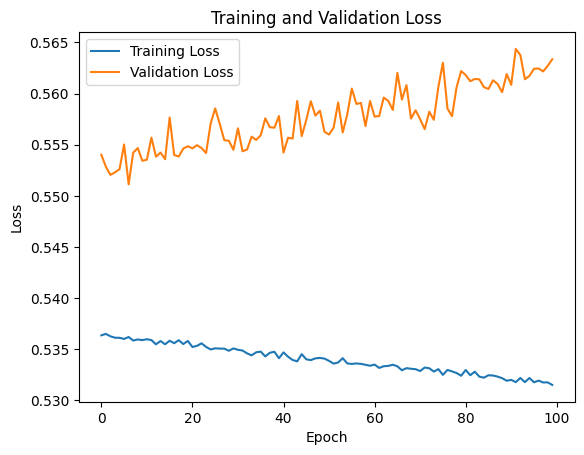

In [ ]:
import matplotlib.pyplot as plt

training_loss = plot_mlp_b.history['loss']
validation_loss = plot_mlp_b.history['val_loss']

# training loss
plt.plot(training_loss, label='Training Loss')
# validation loss
plt.plot(validation_loss, label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
